# Data Analysis

Before diving into the prediction phase, we want to do a proper analysis on the kaggle dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

sns.set(style='white', context='notebook', palette='deep')

In [3]:
# Load the data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
samples = pd.read_csv("data/sample_submission.csv")

In [5]:
train.head(5)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [6]:
test.head()

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?


In [ ]:
Y_train = train["target"]
X_train = train.drop(labels = ["target"], axis = 1)

del train

0    1225312
1      80810
Name: target, dtype: int64

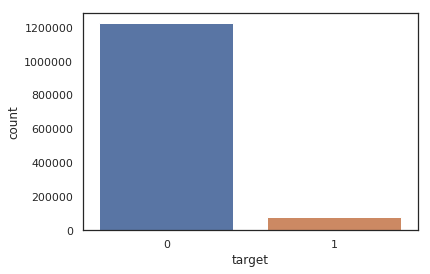

In [15]:
g = sns.countplot(Y_train)
Y_train.value_counts()

In [21]:
TOTAL = len(Y_train)
print( "target value 1: {:.2} %".format(80810*100/TOTAL))

target value 1: 6.2 %


In [27]:
X_train.isnull().any()

qid              False
question_text    False
dtype: bool

The dataset does not contain any null values

Also, we can drop the qid column as it does not give us any additional information.

In [30]:
X_train = X_train.drop(labels = ["qid"], axis = 1)

In [35]:
X_train['length'] = X_train['question_text'].apply(lambda x: len(x))

In [39]:
X_train['length'].describe()

count    1.306122e+06
mean     7.067884e+01
std      3.878428e+01
min      1.000000e+00
25%      4.500000e+01
50%      6.000000e+01
75%      8.500000e+01
max      1.017000e+03
Name: length, dtype: float64

In [76]:
max_idx = X_train['length'].idxmax()
print("Longest Question: \n\n" + X_train.iloc[max_idx, 0])
print("\nLabel: \n" + str(Y_train.iloc[max_idx]))

Longest Question: 

What is [math]\frac{\int_{1x^5}^{3x^{-5}} \tan(\tan({\boxed{\int_{1x^0}^{1x^2} \sum_{\varpi=1}^{\infty} \int_{2x^{-3}}^{2x^2} \sum_{\alpha=7}^{\infty} \underbrace{\sqrt[2]{1x^5}}_{\text{Gauss's Law of Theoretical Probability.}} d\tau dx}}^{1x^0})) d\mu}{\int_{2x^{-3}}^{1x^5} \cos(\int_{2x^2}^{1x^{-3}} \frac{\sqrt[2]{\overbrace{\underbrace{\frac{3x^3+3x^5}{\sqrt[3]{2x^{-3}}}}_{\text{Gauss's Law of Theoretical Probability.}} \times \overbrace{\tan(2x^0)}^{\text{Gauss's Law of Theoretical Probability.}}-\sum_{4=7}^{\infty} \boxed{3x^{-5}}}^{\text{Inverse Function.}}}}{{\boxed{\int_{2x^2}^{2x^4} 3x^1 d9} \div \sum_{6=6}^{\infty} \sqrt[3]{2x^2}+\sqrt[4]{\sin(2x^0+3x^0)}}^{2x^{-4}}+\boxed{\frac{\vec{\boxed{\sum_{\gamma=10}^{\infty} 1x^{-5}}}}{\frac{\sum_{\iota=2}^{\infty} 1x^{-5}-\frac{3x^{-1}}{1x^{-4}}}{\sin(\tan(3x^{-2}))}}}} \times \boxed{\sqrt[2]{{{{\sqrt[5]{2x^5}}^{2x^{-1}}}^{2x^{-1}} \div \sum_{\chi=6}^{\infty} \int_{1x^4}^{2x^{-4}} 3x^2 d\vartheta+{2x^{-3}}^{2x^{-5

In [77]:
min_idx = X_train['length'].idxmin()
print("Shortest Question: \n\n" + X_train.iloc[min_idx, 0])
print("\nLabel: \n" + str(Y_train.iloc[min_idx]))

Shortest Question: 

"

Label: 
1


Text(0, 0.5, 'occurences')

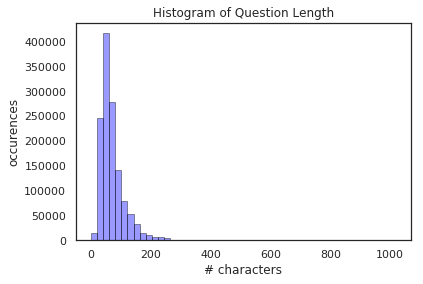

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn histogram
sns.distplot(X_train['length'], hist=True, kde=False, 
             bins=None, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Question Length')
plt.xlabel('# characters')
plt.ylabel('occurences')